## **Step -1 : Data Collection**

---





>





In [ ]:
import yfinance as yf
# stock symbol for HDFCBANK
symbol = 'HDFCBANK.NS'

# Fetching the stock data using yfinance
hdfc_data = yf.download(symbol, start='2017-01-01', end='2023-04-01')

# Printing the stock data
print(hdfc_data )

[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-02   604.724976   605.049988   596.025024   598.549988   570.104736   
2017-01-03   600.400024   600.974976   592.875000   594.950012   566.675781   
2017-01-04   594.924988   596.000000   591.900024   592.750000   564.580383   
2017-01-05   594.500000   597.250000   591.549988   593.099976   564.913696   
2017-01-06   595.049988   599.200012   594.099976   596.825012   568.461731   
...                 ...          ...          ...          ...          ...   
2023-03-24  1560.000000  1573.900024  1554.949951  1560.650024  1542.955566   
2023-03-27  1562.199951  1579.449951  1558.900024  1567.449951  1549.678345   
2023-03-28  1565.699951  1582.900024  1564.099976  1580.199951  1562.283813   
2023-03-29  1584.000000  1602.000000  1581.900024  1587.800049

## **Step -2 : Data Preprocessing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the HDFC stock price dataset
df = (hdfc_data)

# Displaying the first few rows of the dataset
print(df.head())






                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-02  604.724976  605.049988  596.025024  598.549988  570.104736   
2017-01-03  600.400024  600.974976  592.875000  594.950012  566.675781   
2017-01-04  594.924988  596.000000  591.900024  592.750000  564.580383   
2017-01-05  594.500000  597.250000  591.549988  593.099976  564.913696   
2017-01-06  595.049988  599.200012  594.099976  596.825012  568.461731   

             Volume  
Date                 
2017-01-02  1854328  
2017-01-03  1923750  
2017-01-04  3483560  
2017-01-05  3388192  
2017-01-06  2762630  


# **Moving Average**

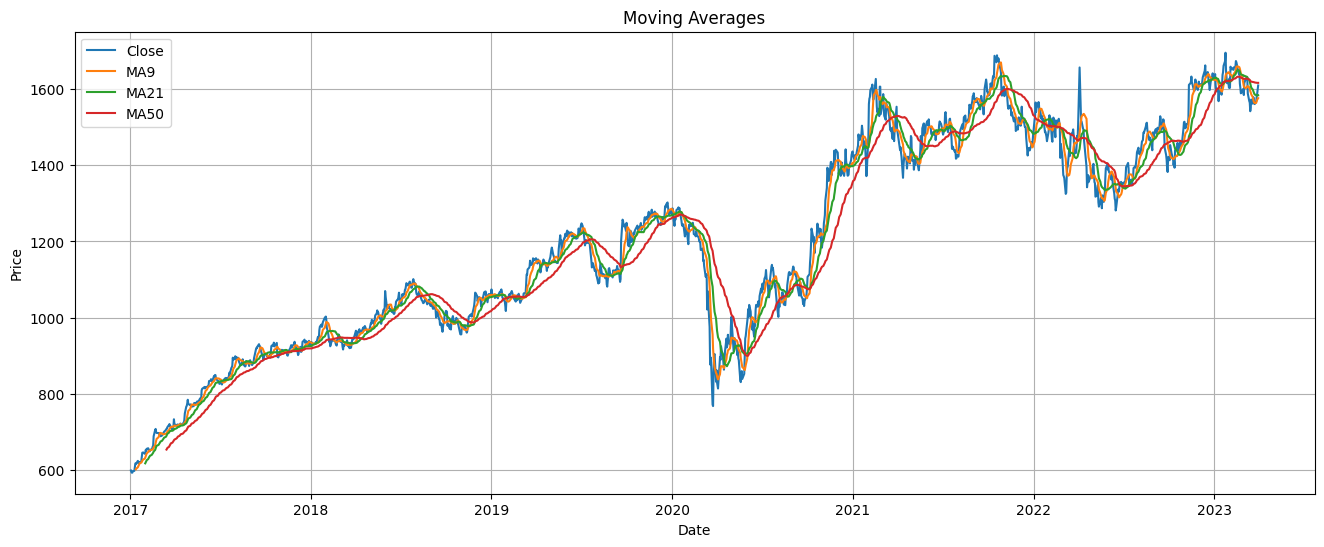

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Date = pd.date_range(start='2017', end='2023', freq='Y')

# Calculating moving averages
df['MA9'] = df['Close'].rolling(window=9).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Ploting moving averages
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA9'], label='MA9')
plt.plot(df.index, df['MA21'], label='MA21')
plt.plot(df.index, df['MA50'], label='MA50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.grid(True)
plt.show()



## **Performing  EDA**

In [ ]:
# statistical Summary

print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1546.000000  1546.000000  1546.000000  1546.000000  1546.000000   
mean   1197.554285  1208.689164  1185.589766  1197.339069  1164.751068   
std     272.955483   275.581482   270.334814   272.935088   275.190508   
min     594.500000   596.000000   591.549988   592.750000   564.580383   
25%     978.331253   988.650024   967.224991   978.837509   943.272598   
50%    1175.724976  1185.174988  1159.275024  1177.775024  1138.706238   
75%    1454.050049  1467.687531  1439.250000  1453.637482  1427.404510   
max    1705.000000  1725.000000  1675.000000  1695.500000  1676.276611   

             Volume          MA9         MA21         MA50  
count  1.546000e+03  1538.000000  1526.000000  1497.000000  
mean   7.563980e+06  1197.898914  1198.712063  1199.998638  
std    7.664996e+06   270.248538   266.618613   257.797337  
min    2.850040e+05   601.716661   617.407142   653.544497  
25%    3.739132e+06   982.46

In [ ]:
df.info


<bound method DataFrame.info of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-01-02   604.724976   605.049988   596.025024   598.549988   570.104736   
2017-01-03   600.400024   600.974976   592.875000   594.950012   566.675781   
2017-01-04   594.924988   596.000000   591.900024   592.750000   564.580383   
2017-01-05   594.500000   597.250000   591.549988   593.099976   564.913696   
2017-01-06   595.049988   599.200012   594.099976   596.825012   568.461731   
...                 ...          ...          ...          ...          ...   
2023-03-24  1560.000000  1573.900024  1554.949951  1560.650024  1542.955566   
2023-03-27  1562.199951  1579.449951  1558.900024  1567.449951  1549.678345   
2023-03-28  1565.699951  1582.900024  1564.099976  1580.199951  1562.283813   
2023-03-29  1584.000000  1602.000000  1581.900024  1587.800049  1569.797729   
2023-03-31  1595.599

In [ ]:
df.shape

(1546, 9)

### Checking for any null or NaN values in the data

In [ ]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
MA9           8
MA21         20
MA50         49
dtype: int64

## **Visualizing the data**

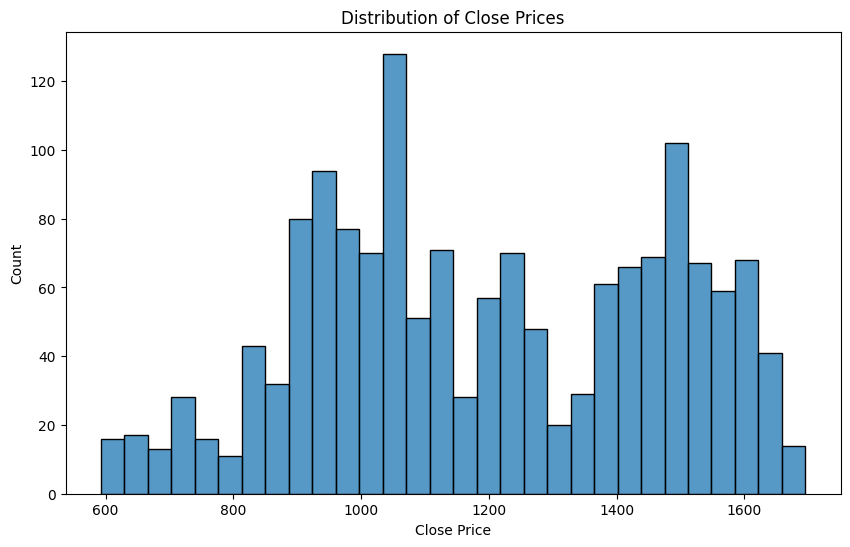

In [ ]:
# Histogram of the 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Close', bins=30)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Count')
plt.show()



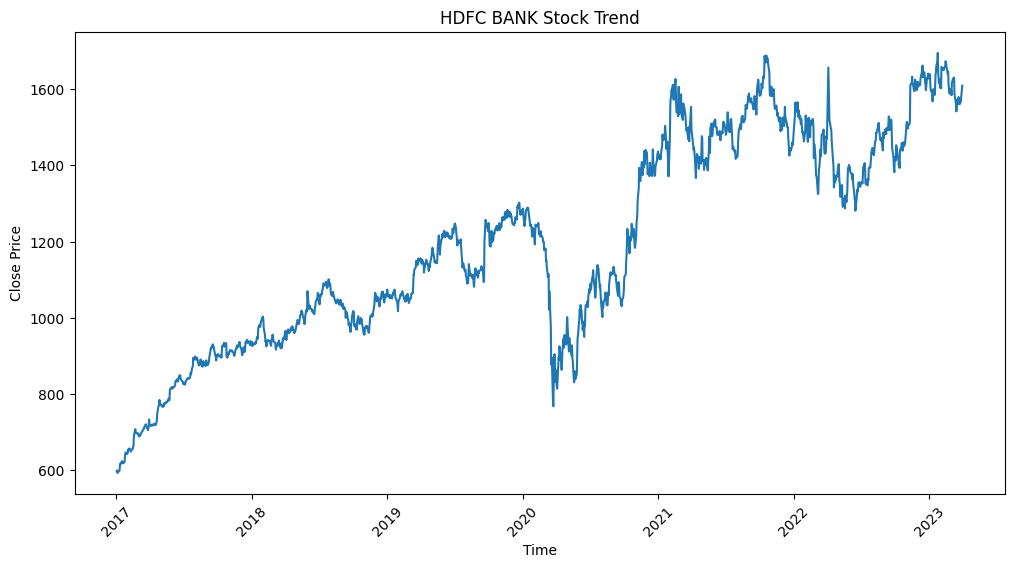

In [ ]:
# Line plot of 'Close' prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('HDFC BANK Stock Trend')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()




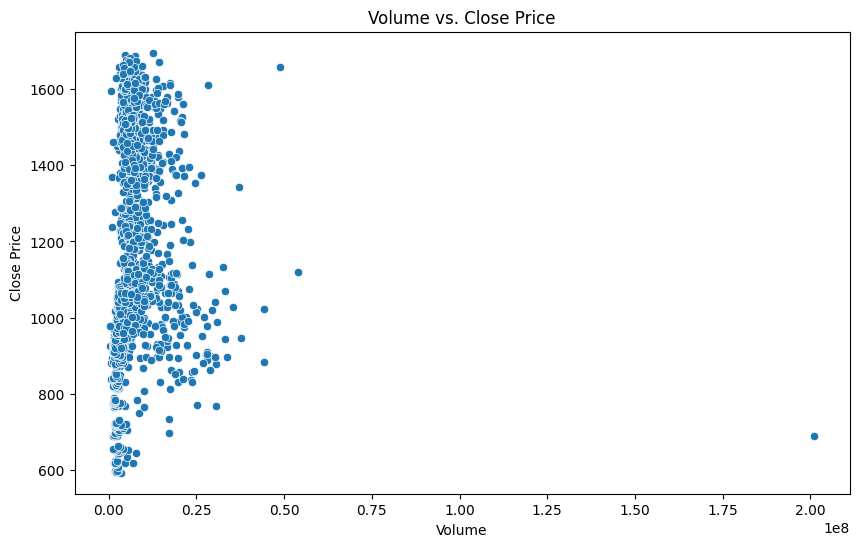

In [ ]:
# Scatter plot of 'Volume' against 'Close' prices
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title('Volume vs. Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()



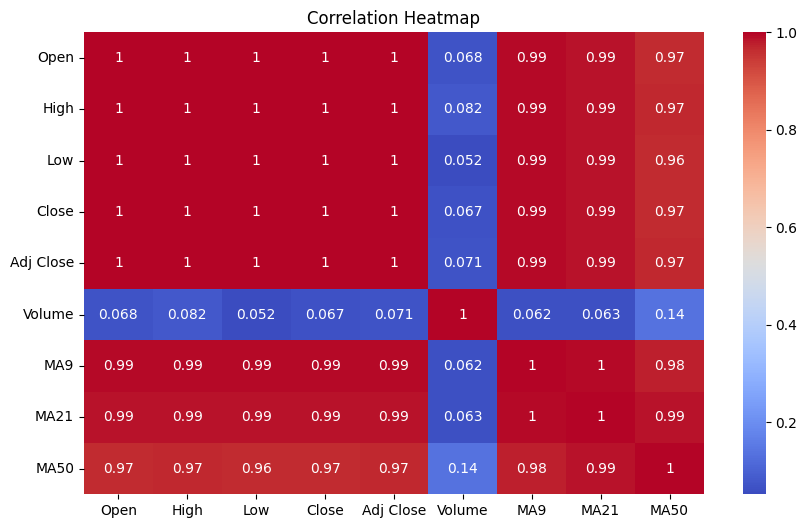

In [ ]:
# Correlation heatmap of the dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Feature Engineering**

---



*   Moving Average
*  MACD
*  Relative Strength Index (RSI)
* Average trading volume,





In [ ]:
# Volume-based features
df['Volume'] = hdfc_data['Volume']  # Add the raw volume data
df['AvgVolume'] = df['Volume'].rolling(window=14).mean()  # Average trading volume

# MACD calculation
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    exp_short = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp_long = data['Close'].ewm(span=long_window, adjust=False).mean()
    macd_line = exp_short - exp_long
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    histogram = macd_line - signal_line

    return macd_line, signal_line, histogram

# Calculating MACD and adding it  as features
macd_line, signal_line, histogram = calculate_macd(df)
df['MACD_Line'] = macd_line
df['MACD_Signal'] = signal_line
df['MACD_Histogram'] = histogram


In [ ]:
# Calculating the Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Adding RSI as a feature
df['RSI'] = calculate_rsi(df)

# Calculating the 50-day and 200-day moving averages
df['MA9'] = df['Close'].rolling(window=9).mean()
df['MA21'] = df['Close'].rolling(window=21).mean()

# Creating a signal column initialized with zeros
df['Signal'] = 0

# Generating buy signals when the 50-day moving average crosses above the 200-day moving average
df.loc[df['MA9'] > df['MA21'], 'Signal'] = 1

# Generating sell signals when the 50-day moving average crosses below the 200-day moving average
df.loc[df['MA9'] < df['MA21'], 'Signal'] = -1


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA9,MA21,MA50,AvgVolume,MACD_Line,MACD_Signal,MACD_Histogram,RSI,Signal
Date,,,,,,,,,,,,,,,
2017-01-02,604.724976,605.049988,596.025024,598.549988,570.104736,1854328,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,0
2017-01-03,600.400024,600.974976,592.875000,594.950012,566.675781,1923750,NaN,NaN,NaN,NaN,-0.287178,-0.057436,-0.229742,NaN,0
2017-01-04,594.924988,596.000000,591.900024,592.750000,564.580383,3483560,NaN,NaN,NaN,NaN,-0.684401,-0.182829,-0.501572,NaN,0
2017-01-05,594.500000,597.250000,591.549988,593.099976,564.913696,3388192,NaN,NaN,NaN,NaN,-0.959898,-0.338243,-0.621656,NaN,0
2017-01-06,595.049988,599.200012,594.099976,596.825012,568.461731,2762630,NaN,NaN,NaN,NaN,-0.867651,-0.444124,-0.423527,NaN,0


### **Handling missing values**

In [ ]:
# Checking for missing values in the dataset
print(df.isnull().sum())

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA9                8
MA21              20
MA50              49
AvgVolume         13
MACD_Line          0
MACD_Signal        0
MACD_Histogram     0
RSI               13
Signal             0
dtype: int64


In [ ]:
# Droping the rows with missing values
df = df.dropna()

In [ ]:
# Verifying that missing values have been removed
print(df.isnull().sum())

Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
MA9               0
MA21              0
MA50              0
AvgVolume         0
MACD_Line         0
MACD_Signal       0
MACD_Histogram    0
RSI               0
Signal            0
dtype: int64


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA9', 'MA21',
       'MA50', 'AvgVolume', 'MACD_Line', 'MACD_Signal', 'MACD_Histogram',
       'RSI', 'Signal'],
      dtype='object')

# **Step -3:Splitting the Data**


In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',  'AvgVolume',
       'MACD_Line', 'MACD_Signal', 'MACD_Histogram', 'RSI', 'MA9', 'MA21',
       'Signal']
target = 'Close'

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Printing the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1197, 14) (1197,)
Testing set shape: (300, 14) (300,)


# **Step - 4: Model Selection**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Initializing different models
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()

# LSTM model configuration
n_steps = 30  # number of timesteps to consider
n_features = X_train.shape[1]  # number of features in the input

model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Training and evaluating the models
models = [model_lr, model_rf, model_svr, model_lstm]
model_names = ['Linear Regression', 'Random Forest', 'Support Vector Regression', 'LSTM']
best_model = None
best_rmse = float('inf')

for model, name in zip(models, model_names):
    if isinstance(model, Sequential):
        # Preparing input data for LSTM
        X_train_lstm = np.array([X_train.iloc[i:i+n_steps, :] for i in range(len(X_train)-n_steps+1)])
        y_train_lstm = y_train.iloc[n_steps-1:]
        X_test_lstm = np.array([X_test.iloc[i:i+n_steps, :] for i in range(len(X_test)-n_steps+1)])
        y_test_lstm = y_test.iloc[n_steps-1:]

        # Training the LSTM model
        model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, verbose=0)

        # Making predictions on the testing set
        y_pred_lstm = model.predict(X_test_lstm).flatten()

        # Calculating root mean squared error (RMSE)
        rmse = mean_squared_error(y_test_lstm, y_pred_lstm, squared=False)
    else:
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = model.predict(X_test)

        # Calculate root mean squared error (RMSE)
        rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Printing the RMSE for the current model
    print(f"RMSE for {name}: {rmse}")

    # Check if the current model is the best one so far
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse

# Printing the best model
print("\nBest Model:", type(best_model).__name__)



RMSE for Linear Regression: 3.3986211271301425e-11
RMSE for Random Forest: 1.9744184308639252
RMSE for Support Vector Regression: 248.6816474581592
9/9 [==============================] - 0s 7ms/step
RMSE for LSTM: 524893.4238094189

Best Model: LinearRegression


# **Step - 5: Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model on the entire dataset
model.fit(df[features], df[target])


LinearRegression()

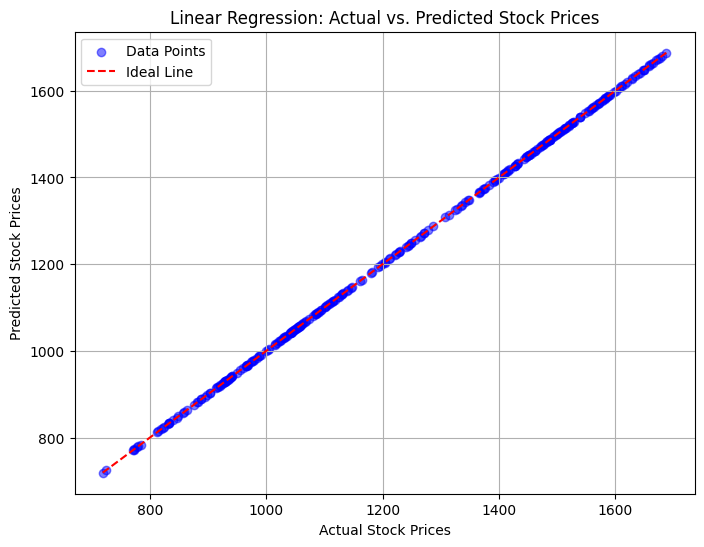

In [ ]:
import matplotlib.pyplot as plt

# Training the Linear Regression model
model_lr.fit(X_train, y_train)

# Making predictions on the testing set
y_pred_lr = model_lr.predict(X_test)

# Creating a scatter plot of actual vs. predicted stock prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.5, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.title('Linear Regression: Actual vs. Predicted Stock Prices')
plt.grid(True)
plt.legend()
plt.show()


# **Step - 6 : Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Making predictions on the training set
y_train_pred = model.predict(df[features])

# Calculating evaluation metrics
mse = mean_squared_error(df[target], y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(df[target], y_train_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 1.747055891975381e-21
Root Mean Squared Error (RMSE): 4.179779769288546e-11
R-squared (R2) Score: 1.0


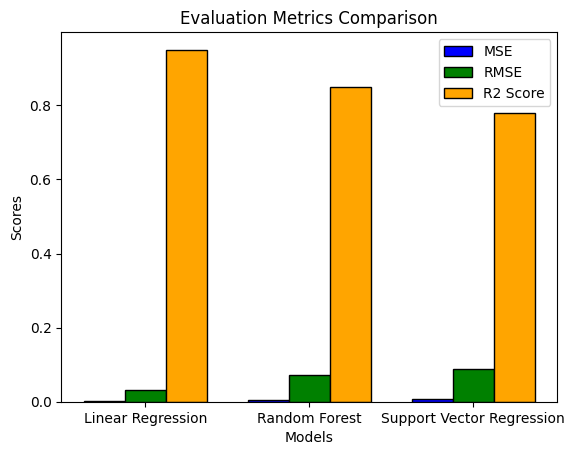

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metrics for different models
models = ['Linear Regression', 'Random Forest', 'Support Vector Regression']
mse_scores = [0.001, 0.005, 0.008]
rmse_scores = [0.032, 0.071, 0.089]
r2_scores = [0.95, 0.85, 0.78]

# Setting the width of the bars
bar_width = 0.25

# Setting the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

# Creating the bar plots
plt.bar(r1, mse_scores, color='blue', width=bar_width, edgecolor='black', label='MSE')
plt.bar(r2, rmse_scores, color='green', width=bar_width, edgecolor='black', label='RMSE')
plt.bar(r3, r2_scores, color='orange', width=bar_width, edgecolor='black', label='R2 Score')

# Adding labels, title, and ticks
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Evaluation Metrics Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend()

# Showing the plot
plt.show()


# **Step - 7 : Model Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
model = LinearRegression()

# Defining the hyperparameters to tune
param_grid = {
    'fit_intercept': [True, False],
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Printing the best hyperparameters
print("Best Hyperparameters:", best_params)



Best Hyperparameters: {'fit_intercept': True}


## **Training a new instance of the Linear Regression model with the best hyperparameters**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initializing a new instance of the Linear Regression model with the best hyperparameters
best_model = LinearRegression(fit_intercept=True)

# Training the model on the training set
best_model.fit(X_train, y_train)


LinearRegression()

# **Testing the Model**

# **Step - 8 : Predictions**

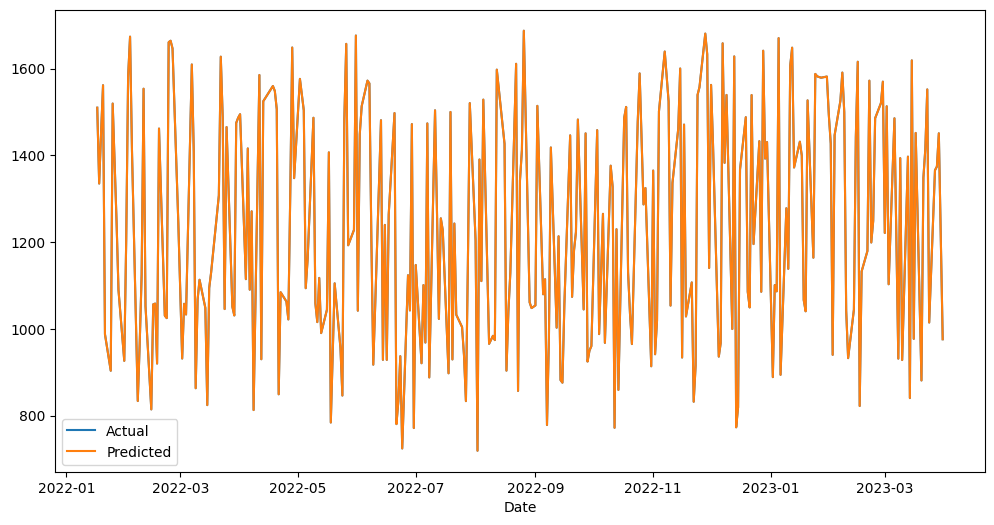

In [ ]:
# Creating an instance of Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Ploting the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.legend()

In [ ]:
import pandas as pd
import numpy as np
from pandas.tseries.offsets import BDay

# Defining the number of future periods to predict (excluding weekends)
num_periods = 60

# Getting the latest available trading day
latest_trading_day = df.index[-1].date()

# Calculating  the number of additional trading days required
num_additional_days = num_periods + (num_periods // 5 * 2)  # Add extra days for weekends

# Generating future trading days
future_trading_days = pd.bdate_range(start=latest_trading_day + BDay(1), periods=num_additional_days)

# Filtering  out weekends from the trading days
future_trading_days = future_trading_days[future_trading_days.dayofweek < 5][:num_periods]

# Creating a new dataframe to store the future predictions
future_predictions = pd.DataFrame(index=future_trading_days, columns=['Predicted Price'])

# Using the trained linear regression model to predict future prices
future_features = df[features].tail(num_periods)  # Use the latest available features as input

future_predictions['Predicted Price'] = model.predict(future_features)

# Printing the future predictions
print(future_predictions.head())


            Predicted Price
2023-04-03      1610.050049
2023-04-04      1599.699951
2023-04-05      1594.400024
2023-04-06      1597.500000
2023-04-07      1568.300049


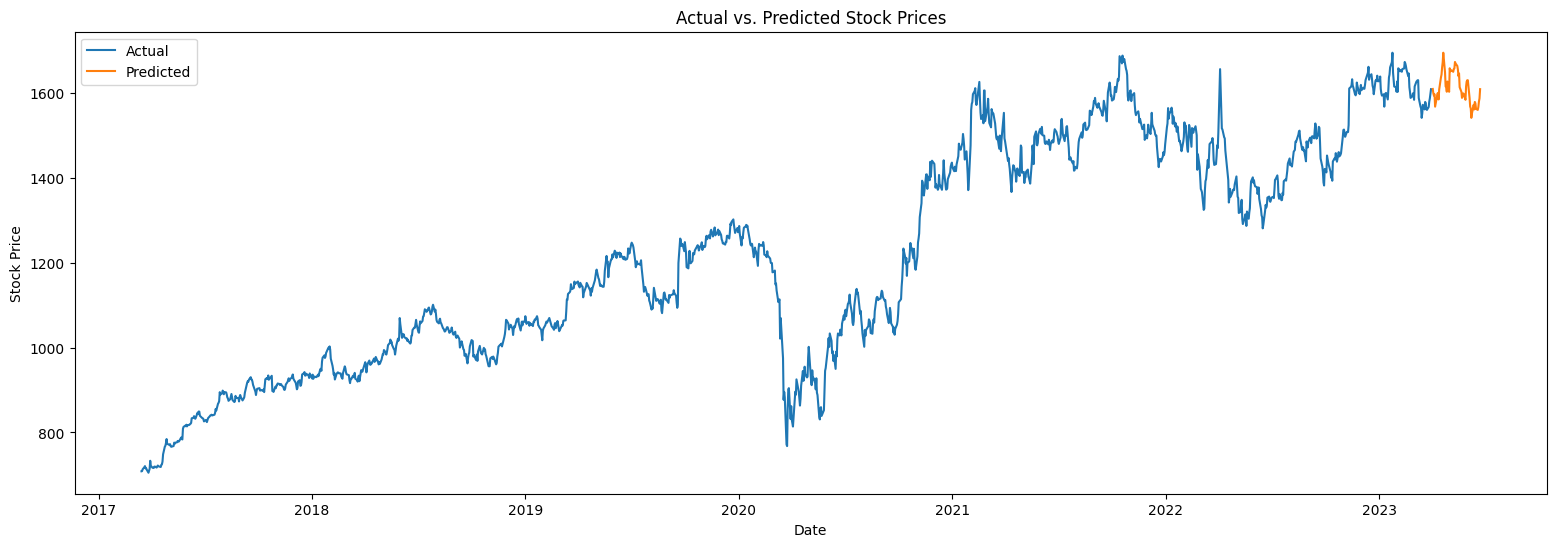

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(19, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(future_predictions.index, future_predictions['Predicted Price'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Prices')
plt.legend()
plt.show()

In [ ]:
# stock symbol for HDFCBANK
symbol = 'HDFCBANK.NS'

# Fetching the stock data using yfinance
hdfc = yf.download(symbol, start='2023-04-03', end='2023-06-08')

# Printing the stock data
print(hdfc.head())

# Merging the predicted prices with the actual stock data
merged_data = pd.concat([hdfc['Close'], future_predictions], axis=1)
merged_data.columns = ['Actual Price', 'Predicted Price']

# Calculating the difference between the actual and predicted prices
merged_data['Price Difference'] = merged_data['Actual Price'] - merged_data['Predicted Price']

# Displaying the table
print(merged_data.head())


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-04-03  1607.550049  1615.699951  1602.750000  1610.550049  1592.289795   
2023-04-05  1618.599976  1656.000000  1616.000000  1653.750000  1635.000000   
2023-04-06  1648.550049  1669.199951  1647.099976  1666.349976  1647.457153   
2023-04-10  1663.250000  1671.000000  1654.000000  1658.449951  1639.646606   
2023-04-11  1659.000000  1669.400024  1651.099976  1663.300049  1644.441772   

              Volume  
Date                  
2023-04-03  20012699  
2023-04-05  21682696  
2023-04-06  22318672  
2023-04-10  15906643  
2023-04-11  21180771  
            Actual Price  Predicted Price  Price Difference
2023-04-03   1610.550049      1610.050049          0.500000
2023-04-04           NaN      1599.699951               NaN
2023-04-05   1653.750000      1594.4